In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

### Black River: TP

In [96]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
location = (41.380678, -82.079920)

In [98]:
r_stations = stations[(stations.LatitudeMeasure>location[0]-0.2) & (stations.LatitudeMeasure<location[0]+0.2) &
                     (stations.LongitudeMeasure>location[1]-0.2) & (stations.LongitudeMeasure<location[1]+0.2)]

In [195]:
ohio_samples['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/L', 'ug/L', nan, 'std units', 'uS/cm @25C', 'mg/l CaCO3',
       'mg/l', 'None', '%', 'tons/ac ft', 'mg/l asNO3', 'mg/l as N',
       'ug/l', 'PCU', '% saturatn', 'deg C', 'mg/l NH4', 'mg/l as P',
       'cfu/100ml', 'ft', 'm', 'm3/sec', 'ft3/s', 'mm/Hg', 'mph',
       'ft/sec', 'tons/day', 'mg/l asPO4', 'NTRU', 'FNU', 'code',
       'mg/l PO4', 'ug/l as Cr', 'ng/l', 'mg/l NO3', 'gal/min', 'pCi/L',
       'mV', 'mg/l as H', 'NTU', 'fg/kg', 'per mil', 'pct modern', 'JTU',
       'pfu/100ml', 'mg/l as Na', 'mg/kg', 'count', 'g/kg', 'mg/l SiO2',
       'mg/kg as N', 'mg/kg as P', 'g/mL @ 20C', 'TON', 'ugAtrazn/L',
       '#/ml', 'g/m2', 'mg/m2', 'ug/kg', 'cal/cm2/d', 'units/cm',
       'L/mgDOC*m', '% by wt', 'MPN/100 ml', 'cn/100 mL', 'cp/L',
       'cysts/10 L', 'in', 'FNRU', 'RFU', 'cp/100 mL', 'ug/L as As',
       'mgd', 'oocyst/10L', 'T.U.', 'col/gram', 'deg F', 'col/mL',
       'MPN/g', 'Deg', 'knots', 'CCE/100 mL', 'CE/100 mL', 'pg/kg', 'AU',
       'IVFU', 'pCi/g', 'dpm

In [103]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))




In [106]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total")]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1361, 63)

In [108]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [175]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=11.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     st_df = stations[stations.MonitoringLocationIdentifier == st]
#     folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                             st_df.LongitudeMeasure.values[0]], 
#                               popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)
#     folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
#                             st_df.LongitudeMeasure.values[0]], radius=20, 
#                         fill=True, fill_color='white',
#                             color = clr,fill_opacity=1,
#                        weight=5).add_to(m)
#     if not index==99:
#         folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.003],
#         icon=DivIcon(
#             icon_size=(150,36),
#             icon_anchor=(0,0),
#             html='<div style="font-size: 24pt">{}</div>'.format(index+1),
#             )
#         ).add_to(m)

# for ind, st in r_stations.iterrows():
#     folium.Marker(location=[st.LatitudeMeasure, st.LongitudeMeasure], popup=folium.Popup(html=st.MonitoringLocationIdentifier,show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')).add_to(m)


Show_IDS = [
["21OHIO_WQX-B01K29", False],
["21OHIO_WQX-B01K32", False],
["21OHIO_WQX-B01S22", False],
["21OHIO_WQX-B01K51", False],
["21OHIO_WQX-B01S15", False],
["21OHIO_WQX-B01S14", False],
["21OHIO_WQX-B01S06", False],
["21OHIO_WQX-B01K53", False],
["21OHIO_WQX-501510", True],
["21OHIO_WQX-B01E01", False],
["21OHIO_WQX-B01W07", False],
["21OHIO_WQX-B01S09", False],
["USGS-04200500", True],
]



for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [8,9,]:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m


21OHIO_WQX-B01K29
21OHIO_WQX-B01K32
21OHIO_WQX-B01S22
21OHIO_WQX-B01K51
21OHIO_WQX-B01S15
21OHIO_WQX-B01S14
21OHIO_WQX-B01S06
21OHIO_WQX-B01K53
21OHIO_WQX-501510
21OHIO_WQX-B01E01
21OHIO_WQX-B01W07
21OHIO_WQX-B01S09
USGS-04200500


In [154]:
selected_stations = [s[0] for s in Show_IDS]
selected_stations

['21OHIO_WQX-B01K29',
 '21OHIO_WQX-B01K32',
 '21OHIO_WQX-B01S22',
 '21OHIO_WQX-B01K51',
 '21OHIO_WQX-B01S15',
 '21OHIO_WQX-B01S14',
 '21OHIO_WQX-B01S06',
 '21OHIO_WQX-B01K53',
 '21OHIO_WQX-501510',
 '21OHIO_WQX-B01E01',
 '21OHIO_WQX-B01W07',
 '21OHIO_WQX-B01S09',
 'USGS-04200500']

In [176]:
WQP_name = "Phosphorus"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(248, 63)

In [177]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Vermilion_River_data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [178]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [179]:
len(selected_stations)

13

In [196]:
mkg_units = ['ug/L', 'ug/l', 'ug/l as Cr', 'ug/kg', 'ug/L as As', 'ug/l      ', 'ug        ', 'ug/m3', 'ug', 'ug/g', 'pg/g', 'ug/kg     ']

In [198]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l as P', 'mg/l', 'mg/kg'], dtype=object)

In [2]:
river='Black_R'

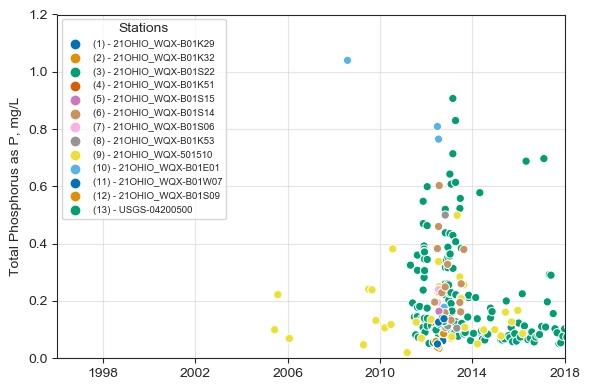

In [181]:

fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(all_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc=2)

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,1.2)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [183]:
# master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = ['HTLP (NCWQR)']

In [201]:
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(selected_stations)]

In [202]:
master_st_df['USGSPCode'] = 0

In [203]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &    mean &     std &   min &   25\% &   50\% &     75\% &      max \\
MonitoringLocationIdentifier &        &         &         &       &       &       &         &          \\
\midrule
21OHIO\_WQX-B01K29            &    5.0 &  206.05 &  460.60 &  0.04 &  0.06 &  0.06 &    0.06 &  1030.00 \\
21OHIO\_WQX-B01K32            &    5.0 &  138.06 &  308.54 &  0.03 &  0.06 &  0.09 &    0.12 &   690.00 \\
21OHIO\_WQX-B01S22            &    5.0 &  113.90 &  254.41 &  0.10 &  0.12 &  0.13 &    0.14 &   569.00 \\
21OHIO\_WQX-B01K51            &    4.0 &  114.62 &  228.92 &  0.11 &  0.13 &  0.18 &  114.67 &   458.00 \\
21OHIO\_WQX-B01S15            &    4.0 &    0.13 &    0.03 &  0.10 &  0.12 &  0.13 &    0.14 &     0.16 \\
21OHIO\_WQX-B01S14            &   16.0 &    0.28 &    0.14 &  0.13 &  0.16 &  0.24 &    0.38 &     0.60 \\
21OHIO\_WQX-B01S06            &    3.0 &    0.19 &    0.05 &  0.14 &  0.17 &  0.20 &    0.22 &     0.24 \\
21OHIO\_WQX-B01K5

In [204]:
master_stations = ['21OHIO_WQX-501510', 'USGS-04200500']

In [206]:
master_st_df[master_st_df.MonitoringLocationIdentifier.isin(master_stations)][[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].sort_values('ActivityStartDate').to_csv(
    'One_by_one/Western/US/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [45]:
# Finde station here:
# https://www.hydrocloud.org
site = '04200500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [46]:
discharge.columns

Index(['USGS:04200500:00060:00003', 'USGS:04200500:00060:00003_qualifiers'], dtype='object')

In [48]:
discharge['Flow, CFS']=discharge['USGS:04200500:00060:00003']

In [49]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-04199500'

In [51]:
discharge[discharge.Source=='USGS-04200500'][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [116]:
df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Vermilion_River_data.csv')
df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
df_Q_heideleberg['Source'] = 'HTLP (NCWQR)'
# df_Q_heideleberg['Discharge, cms'] = 0.028*df_Q_heideleberg['Flow, CFS']


In [117]:
discharge = discharge.append(df_Q_heideleberg)

In [52]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

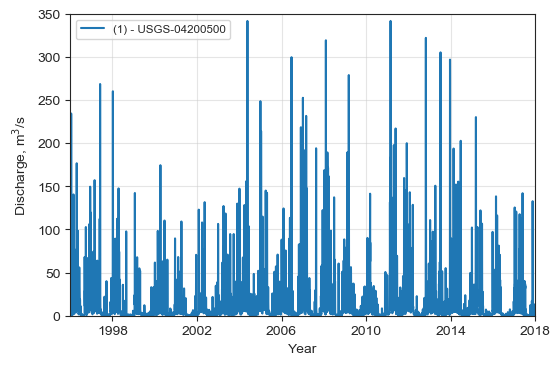

In [55]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(1) - USGS-04200500'], loc=2, fontsize='small')
ax.set_ylim(0,350)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [207]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [3]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Black_R/EGRET Result/TP/Black_River_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Black_R/EGRET Result/TP/Black_River_TP_Sample.csv')


In [4]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


In [5]:
river = 'Black_R'

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


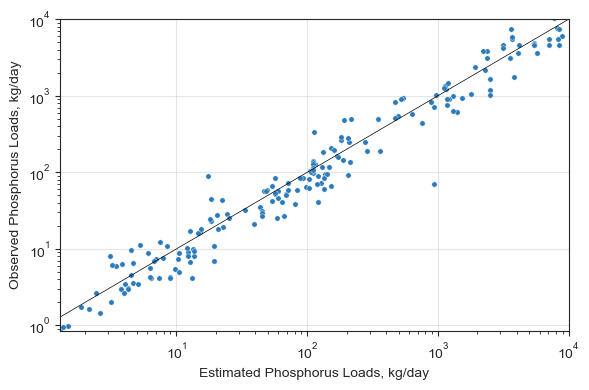

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000],[-100,100000], 'k', lw=0.5)
plt.xlim(0,10_000)
plt.ylim(0,10_000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [7]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


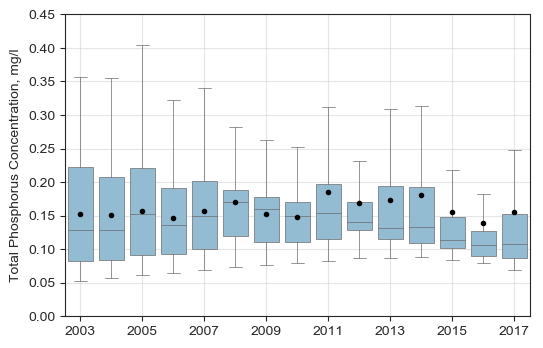

In [16]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(6.5, 21.5)
plt.xticks([int(x) for x in np.linspace(7,21,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,0.45)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')




In [220]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




In [221]:
EGRET_Sample

,Unnamed: 0,Date,Q,LogQ,ConcLow,ConcHigh,Uncen,ConcAve,Julian,Month,...,DecYear,MonthSeq,waterYear,SinDY,CosDY,yHat,SE,ConcHat,Fx_Hat,Fx_C
0,1,2005-06-07,0.801367,-0.221437,0.100,0.100,1,0.100,56770,6,...,2005.431621,1866,2005,0.416542,-0.909117,-1.409840,0.512280,0.278420,19.277271,6.923809
1,2,2005-07-28,26.108132,3.262247,0.222,0.222,1,0.222,56821,7,...,2005.571347,1867,2005,-0.433422,-0.901191,-2.448023,0.436109,0.095090,214.499417,500.774865
2,3,2006-01-26,7.192479,1.973036,0.069,0.069,1,0.069,57003,1,...,2006.069977,1873,2006,0.425649,0.904888,-3.449594,0.490980,0.035827,22.263758,42.878683
3,4,2009-04-14,6.682776,1.899533,0.047,0.047,1,0.047,58177,4,...,2009.283676,1912,2009,0.977698,-0.210016,-2.281794,0.484936,0.114840,66.307887,27.137416
4,5,2009-07-06,0.518198,-0.657397,0.241,0.241,1,0.241,58260,7,...,2009.511073,1915,2009,-0.069518,-0.997581,-1.793822,0.493052,0.187820,8.409137,10.790132
5,6,2009-08-27,0.317149,-1.148385,0.239,0.239,1,0.239,58312,8,...,2009.653539,1916,2009,-0.821885,-0.569653,-1.869951,0.452412,0.170740,4.678557,6.548993
6,7,2009-10-27,0.869327,-0.140036,0.132,0.132,1,0.132,58373,10,...,2009.820662,1918,2010,-0.903048,0.429540,-1.816360,0.410881,0.176939,13.289884,9.914503
7,8,2010-03-17,17.867930,2.883007,0.106,0.106,1,0.106,58514,3,...,2010.206963,1923,2010,0.963662,0.267123,-2.361297,0.550622,0.109733,169.404731,163.641651
8,9,2010-06-24,7.050895,1.953155,0.118,0.118,1,0.118,58613,6,...,2010.478196,1926,2010,0.136568,-0.990631,-1.690534,0.494996,0.208457,126.991304,71.885282
9,10,2010-07-22,1.347882,0.298534,0.382,0.382,1,0.382,58641,7,...,2010.554909,1927,2010,-0.338198,-0.941075,-1.945397,0.448292,0.158039,18.404728,44.486572


In [222]:

# EGRET_Sample.groupby('waterYear').mean()

In [223]:
EGRET_Daily_an['Fx_SE']

0      29.383666
1      38.016073
2      20.061472
3       8.057594
4      23.019998
5       8.908356
6      20.139118
7      32.842316
8      79.002490
9      56.302248
10     53.008108
11     65.966561
12    103.080727
13     51.672806
14     31.789524
15    142.976246
16     79.859034
17    100.353997
18    133.188611
19     82.046753
20     56.924689
21     78.333766
22    140.497058
23     80.207349
Name: Fx_SE, dtype: float64

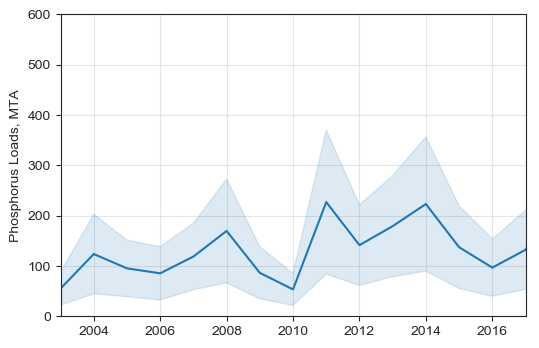

In [17]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]-EGRET_Daily_an['Fx_SE'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]+EGRET_Daily_an['Fx_SE'][5:-1], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,600)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PFlux.pdf')


In [226]:
print(EGRET_Daily_an[['waterYear', 'FluxYearMTA','Fx_SE']].round(1).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 waterYear &  FluxYearMTA &  Fx\_SE \\
\midrule
      1996 &         50.5 &   29.4 \\
      1997 &         62.8 &   38.0 \\
      1998 &         35.4 &   20.1 \\
      1999 &         13.9 &    8.1 \\
      2000 &         38.0 &   23.0 \\
      2001 &         15.8 &    8.9 \\
      2002 &         32.8 &   20.1 \\
      2003 &         55.0 &   32.8 \\
      2004 &        123.7 &   79.0 \\
      2005 &         95.2 &   56.3 \\
      2006 &         85.4 &   53.0 \\
      2007 &        118.6 &   66.0 \\
      2008 &        169.5 &  103.1 \\
      2009 &         86.3 &   51.7 \\
      2010 &         53.4 &   31.8 \\
      2011 &        226.9 &  143.0 \\
      2012 &        141.3 &   79.9 \\
      2013 &        179.1 &  100.4 \\
      2014 &        223.0 &  133.2 \\
      2015 &        137.2 &   82.0 \\
      2016 &         96.7 &   56.9 \\
      2017 &        132.0 &   78.3 \\
      2018 &        239.9 &  140.5 \\
      2019 &        162.6 &   80.2 \\
\bottomrul

In [343]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,45.450090,154.927809,0.107491,0.587143,2.451271,22.832016,1419.508013
1997,365.0,71.871339,294.147298,0.232104,2.298074,7.870464,39.297391,3754.870840
1998,365.0,85.259313,420.553422,0.265809,1.327804,6.604827,29.823576,6454.933370
1999,365.0,22.920055,117.362999,0.028755,0.434161,1.148823,4.495965,1851.838402
2000,366.0,47.091098,180.605984,0.208652,1.257016,4.280271,20.609851,2203.257500
2001,365.0,14.174214,61.717835,0.065111,0.555528,1.724630,3.692831,679.087142
2002,365.0,40.780103,179.159069,0.040903,0.646393,2.419541,8.752563,1886.041117
2003,365.0,51.655180,158.595164,0.218792,1.708126,5.774820,27.604075,1471.889983
2004,366.0,92.995694,272.424009,0.581799,4.338649,12.515066,40.086364,2026.102642
